## T de Student
- pt() -> Recebe como parametros -> t= e grau de liberdade
- lower.tail= -> Indica que a busca está À DIREITA da amostragem.

### Exemplo - Salario Cientista de dados

In [61]:
# Salario de cientistas 75 por hora. Amostra 9. S=10. Probabilidade de ser menos de 80 por hora?
pt(1.5, 8)

# Probabilidade de ser maior que 80?
pt(1.5, 8, lower.tail=F)

# Soma dos resultados
pt(1.5, 8) + pt(1.5, 8, lower.tail = F)

[1] 0.9139984

[1] 0.08600165

[1] 1

## Binomial
- dbinom() -> Retorna a probabilidade pontual.
- pbinom() -> Retorna a probabilidade acumulativa
- x= | q= -> Valores buscados
- p= | prob= -> Probabilidade
- size= -> Eventos

In [62]:
# Jogar uma moeda cinco vezes, qual a prob. de dar cara 3 vezes?
dbinom(x=3, prob=0.5, size = 5)

# Passar 4 sinais de 4 tempos cada, qual a prob. de pegar 0, 1, 2, 3 e 4 sinais verdes?
pbinom(q=4, prob=0.25, size=4)

# Prova de concurso com 12 questões, chutando todas, qual a chance de acertar 7 questoes?
# Cada questão tem 4 alternativas.
dbinom(prob=0.25, size = 12, x=7)

# Ao passar 4 sinais de 4 tempos cada. Qual a prob. de pegar 3 ou mais sinais verdes?
pbinom(q=2, prob=0.25, size=4, lower.tail = F)
1 - pbinom(q=2, prob=0.25, size=4)
pbinom(q=2, prob=0.25, size=4, lower.tail = F) + pbinom(q=2, prob = 0.25, size=4)


[1] 0.3125

[1] 1

[1] 0.01147127

[1] 0.05078125

[1] 0.05078125

[1] 1

## Poisson
- dpois() -> Probabilidade pontual
- ppois() -> Probabilidade comulativa
- lower.tail() -> 'maior que', região a direita dos dados
- lambda= -> média
- x= -> probabilidade esperada

In [63]:
# Numero de acidentes num dia é 2. Qual a prob de ocorrer 3 em um dia?
dpois(x = 3,lambda = 2)

# Numero de acidentes num dia é 2. Qual a prob de ocorrer 3 ou menos em um dia?
ppois(q=3, lambda = 2)

# Numero de acidentes num dia é 2. Qual a prob de ocorrer menos que 3 em um dia?
ppois(q=2, lambda = 2)

# Numero de acidentes num dia é 2. Qual a prob de ocorrer mais que 3 em um dia?
1 - ppois(q=3, lambda = 2)
ppois(q=3, lambda = 2, lower.tail = F)

[1] 0.180447

[1] 0.8571235

[1] 0.6766764

[1] 0.1428765

[1] 0.1428765

## QUI-QUADRADO
- chisq.test() -> Retorna um teste Qui-Quadrado

In [64]:
# Criando DB de exemplo
novela = matrix(c(19, 6, 43, 32), nrow=2, byrow=T)
rownames(novela) = c('Masculino', 'Feminino')
colnames(novela) = c('Assiste', 'Não assiste')
novela

# Qui_Quadrado
# p-value > 0.05 (ALPHA) -> Hipótese nula NÃO REJEITADA!
chisq.test(novela)

# Alterando valores da DB.
novela = matrix(c(22, 3, 43, 32), nrow=2, byrow=T)
rownames(novela) = c('Masculino', 'Feminino')
colnames(novela) = c('Assiste', 'Não assiste')
novela

# Qui_Quadrado
# p-value < 0.05 (ALPHA) -> Hipótese nula REJEITADA!
# A uma diferença significativa entre homens e mulheres que assistem
# ou não novelas.
chisq.test(novela)

,Assiste,Não assiste
Masculino,19,6
Feminino,43,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  novela
X-squared = 2.0374, df = 1, p-value = 0.1535


,Assiste,Não assiste
Masculino,22,3
Feminino,43,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  novela
X-squared = 6.4615, df = 1, p-value = 0.01102


## ANOVA
- aov() -> Retorna uma analise de variancia
- Pr(>F) -> Indica o valor de P no retorno
- ~ -> Operador colocado antes dos fatores de variancia

In [65]:
anova_DB = read.csv('anova.csv', sep=';', na.strings='', stringsAsFactors=T)
dim(anova_DB)
summary(anova_DB)
head(anova_DB)

[1] 24  3

 Sexo   Remedio     Horas       
 F:12   A:8     Min.   : 5.000  
 M:12   B:8     1st Qu.: 6.000  
        C:8     Median : 7.000  
                Mean   : 7.417  
                3rd Qu.: 9.250  
                Max.   :10.000  

,Sexo,Remedio,Horas
,<fct>,<fct>,<int>
1,F,A,5
2,F,A,10
3,F,A,7
4,F,A,7
5,M,A,7
6,M,A,6


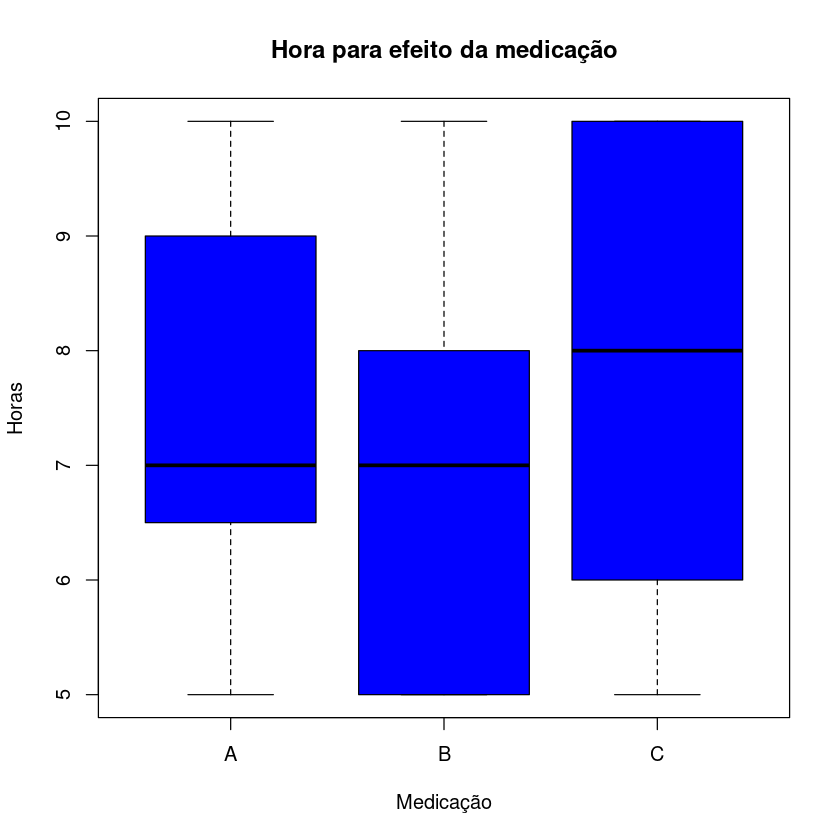

In [66]:
# Comparando horas para efeito de cada medicação
boxplot(anova_DB$Horas ~ anova_DB$Remedio, main='Hora para efeito da medicação',
xlab='Medicação', ylab='Horas', col='blue')

# 

In [67]:
# Analise de variancia de UM FATOR
# Hipotese nula NÃO REJEITADA
an = aov(Horas ~ Remedio, data=anova_DB)
summary(an)

# Analise de variancia de DOIS FATORES
# Hipotese nula NÃO REJEITADA
an = aov(Horas ~ Remedio * Sexo, data=anova_DB)
summary(an)

            Df Sum Sq Mean Sq F value Pr(>F)
Remedio      2   4.08   2.042   0.538  0.592
Residuals   21  79.75   3.798               

             Df Sum Sq Mean Sq F value Pr(>F)
Remedio       2   4.08   2.042   0.533  0.596
Sexo          1   4.17   4.167   1.087  0.311
Remedio:Sexo  2   6.58   3.292   0.859  0.440
Residuals    18  69.00   3.833               

### Caso existam diferenças significativas (Pr(>F) for menor ou igual a 0.05)

## Tukey test
- TukeyHSD() -> Retrona teste de Tukey
- p adj -> Indica o valor de P no retorno

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Horas ~ Remedio * Sexo, data = anova_DB)

$Remedio
      diff       lwr      upr     p adj
B-A -0.625 -3.123427 1.873427 0.8011051
C-A  0.375 -2.123427 2.873427 0.9226431
C-B  1.000 -1.498427 3.498427 0.5732500

$Sexo
         diff        lwr      upr     p adj
M-F 0.8333333 -0.8459446 2.512611 0.3109477

$`Remedio:Sexo`
                 diff      lwr     upr     p adj
B:F-A:F -1.500000e+00 -5.89979 2.89979 0.8816496
C:F-A:F  7.500000e-01 -3.64979 5.14979 0.9935270
A:M-A:F  5.000000e-01 -3.89979 4.89979 0.9990466
B:M-A:F  7.500000e-01 -3.64979 5.14979 0.9935270
C:M-A:F  5.000000e-01 -3.89979 4.89979 0.9990466
C:F-B:F  2.250000e+00 -2.14979 6.64979 0.5936233
A:M-B:F  2.000000e+00 -2.39979 6.39979 0.7010347
B:M-B:F  2.250000e+00 -2.14979 6.64979 0.5936233
C:M-B:F  2.000000e+00 -2.39979 6.39979 0.7010347
A:M-C:F -2.500000e-01 -4.64979 4.14979 0.9999681
B:M-C:F -3.552714e-15 -4.39979 4.39979 1.00

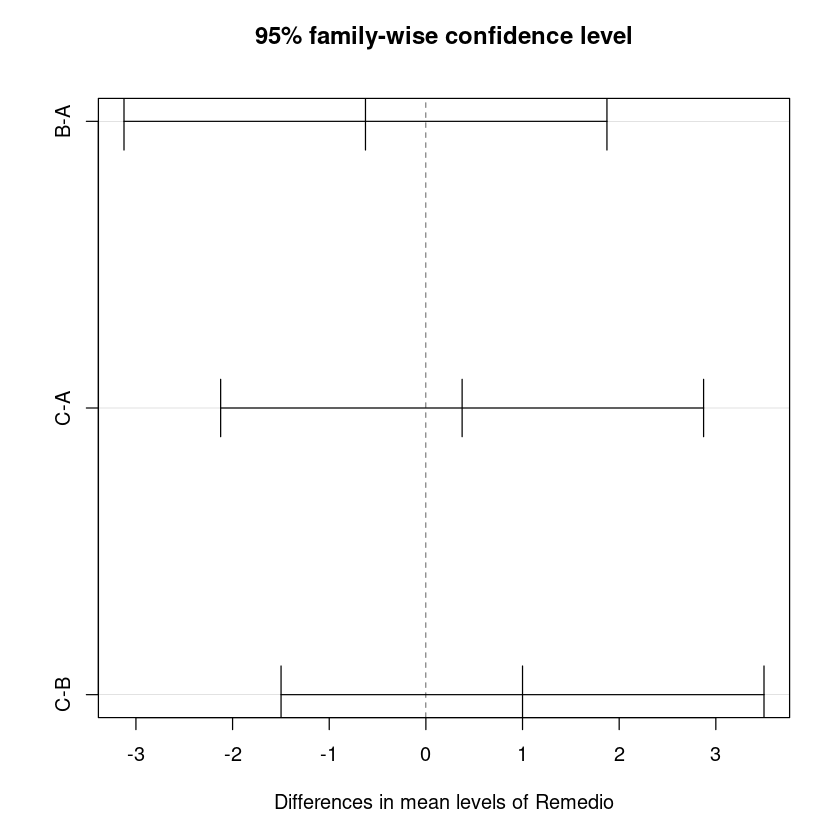

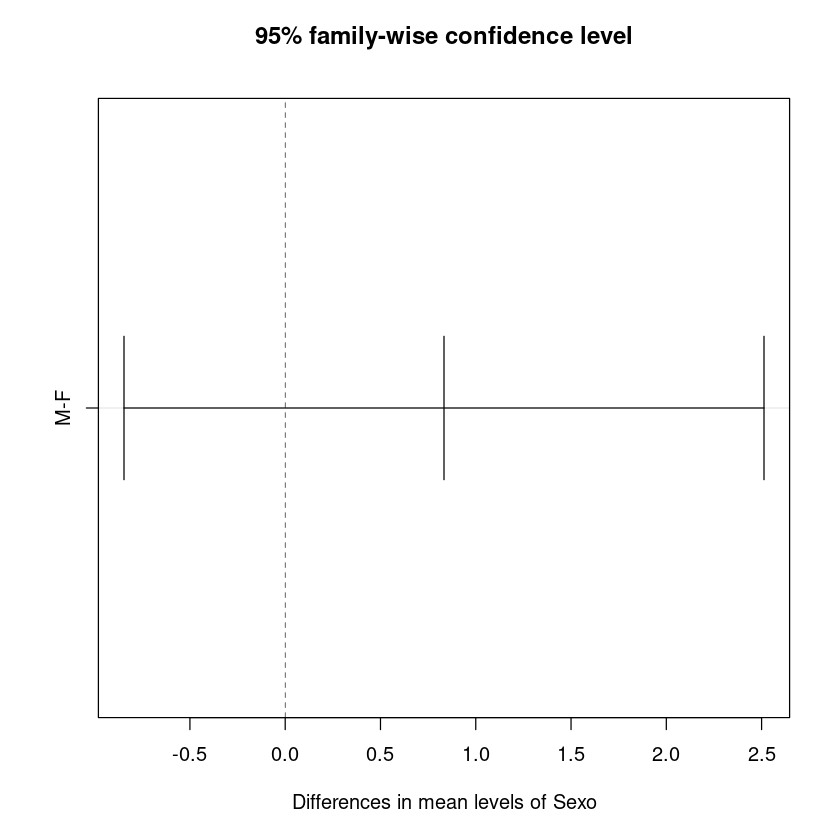

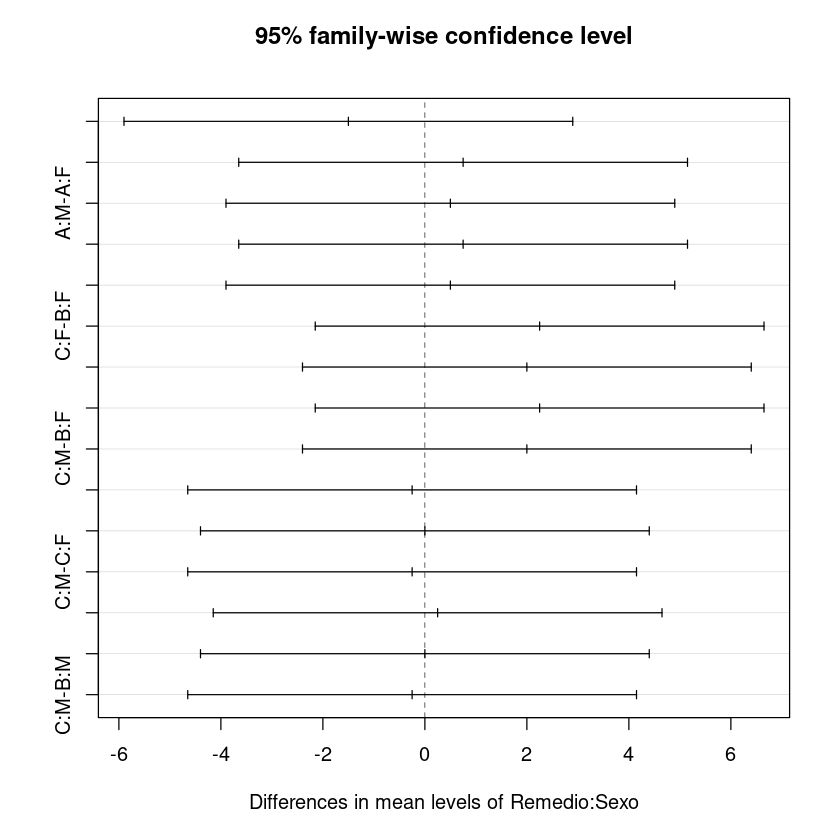

In [68]:
tukey = TukeyHSD(an)
tukey

# Gera gráficos com os dados Tukey.
# 1. Relação entre as médias
# 2. Nivel e intervalo de confiança
plot(tukey)